# <center> Exercise 05

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [2]:
data = pd.read_csv('marketing_AB.csv')

### Overview of the data

In [3]:
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
print(f"The Shape of Dataset:{ data.shape}")

The Shape of Dataset:(588101, 7)


In [5]:
column_names = data.columns
column_names

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [6]:
data.nunique()

Unnamed: 0       588101
user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

### Check the features

#### Explanation for each feature in the marketing_AB dataset:

1- "Unnamed: 0": This column appears to be an index column that holds a unique identifier for each row in the CSV file. It is often automatically generated by pandas or other Python libraries when reading in data from a CSV file.

2- "user id": This column holds a unique identifier for each user who was included in the marketing campaign. This could be an anonymous ID generated by the marketing team, or it could be a user ID associated with the marketing platform or website being used.

3- "test group": This column indicates which group the user was assigned to in the A/B test. In an A/B test, users are randomly assigned to one of two groups (usually called "A" and "B") and each group is shown a different version of the marketing campaign. The goal is to test which version of the campaign is more effective at achieving the desired outcome (in this case, "converted"). 

ad: They have seen the ads --- psa: They don't have seen any ads.

4- "converted": This column indicates whether or not the user "converted" as a result of the marketing campaign. Conversion can mean different things depending on the goals of the campaign, but it typically refers to a user taking a specific action that the marketer wants them to take (e.g. making a purchase, signing up for a newsletter, etc.).

5- "total ads": This column indicates how many ads the user was shown during the course of the marketing campaign. This could be a measure of how much exposure the user had to the campaign, or it could be a factor in determining which version of the campaign the user was shown (e.g. users in Group A might be shown more ads than users in Group B).

6- "most ads day": This column indicates the day on which the user was shown the most ads during the campaign. This could be useful for analyzing whether there are certain days of the week or times of day when the campaign is more effective.

7- "most ads hour": This column indicates the hour of the day when the user was shown the most ads during the campaign. This could also be useful for analyzing when the campaign is most effective.

### Replace the 'Unnamed: 0' column with the index

In [7]:
data = data.set_index('Unnamed: 0')

In [8]:
data.head()

,user id,test group,converted,total ads,most ads day,most ads hour
Unnamed: 0,,,,,,
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [9]:
# Check null values
data.isnull().any()

user id          False
test group       False
converted        False
total ads        False
most ads day     False
most ads hour    False
dtype: bool

In [10]:
# display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


In [11]:
# Display summary statistics of the dataset
data.describe(include='all')

,user id,test group,converted,total ads,most ads day,most ads hour
count,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,2,2,NaN,7,NaN
top,NaN,ad,False,NaN,Friday,NaN
freq,NaN,564577,573258,NaN,92608,NaN
mean,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [12]:
# Count two groups of test

seen_ornot_seen_ads = data["test group"].value_counts()
seen_ornot_seen_ads

ad     564577
psa     23524
Name: test group, dtype: int64

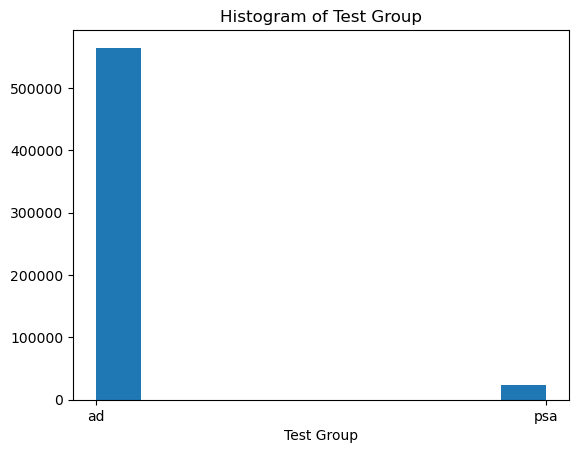

In [13]:
# Create a histogram of the 'test group' column

plt.hist(data['test group'])
plt.xlabel('Test Group')
plt.title('Histogram of Test Group')
plt.show()

In [14]:
# Count purchases

bought_ornot_bought = data["converted"].value_counts()
bought_ornot_bought

False    573258
True      14843
Name: converted, dtype: int64

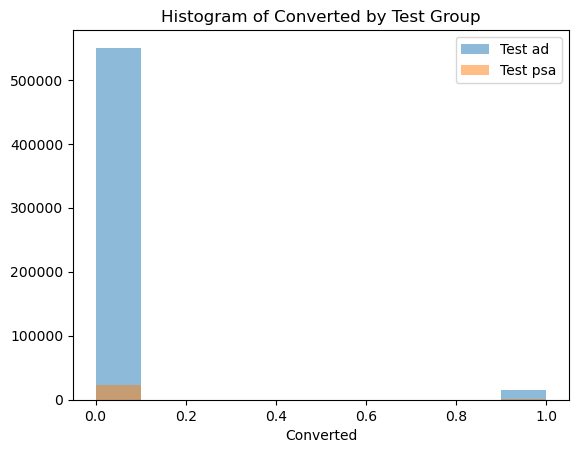

In [15]:
# Convert the 'test group' column to string type
data['test group'] = data['test group'].astype(str)

# Convert the 'converted' column to integer type
data['converted'] = data['converted'].astype(int)

# Separate the test groups into separate dataframes
test_ad = data[data['test group'] == 'ad']
test_psa = data[data['test group'] == 'psa']

# Create a histogram of the 'converted' column for each group
plt.hist(test_ad['converted'], alpha=0.5, label='Test ad')
plt.hist(test_psa['converted'], alpha=0.5, label='Test psa')


plt.xlabel('Converted')
plt.title('Histogram of Converted by Test Group')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Test group VS. Converted')

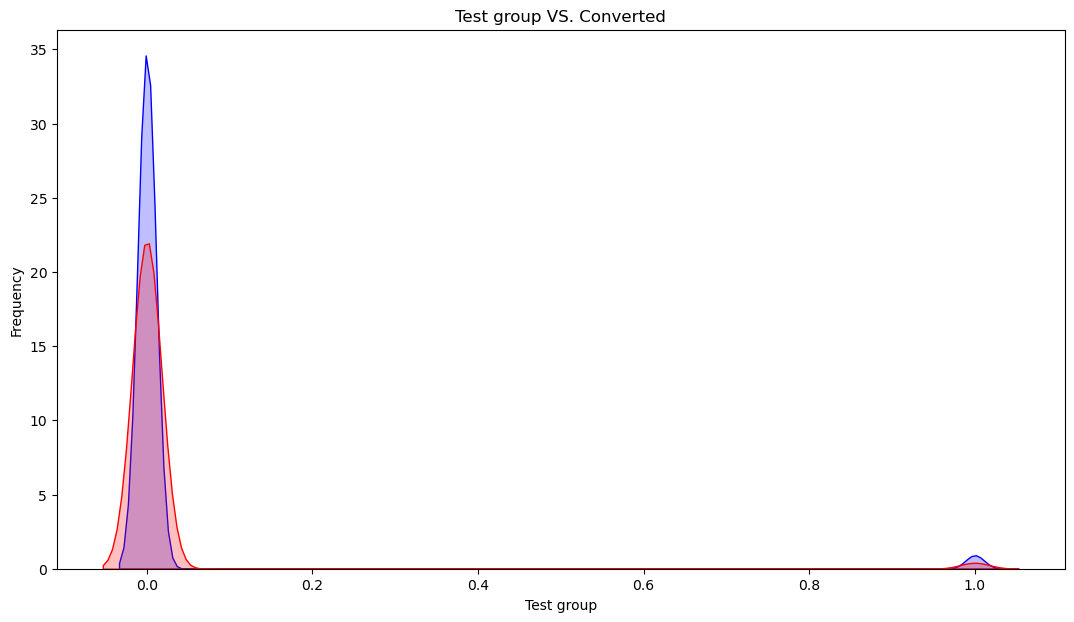

In [16]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(data.loc[(data['test group'] == 'ad'),
                        'converted'] , color='b',
               fill=True,label='Seen ad')
ax=sns.kdeplot(data.loc[(data['test group'] == 'psa'),
                        'converted'] , color='r',
               fill=True, label='Not seen')
ax.set(xlabel='Test group', ylabel='Frequency')
plt.title('Test group VS. Converted')

### Calculate mean:

In [17]:
mean_converted = data.converted.mean()
mean_test_ad = test_ad.converted.mean()
mean_test_psa = test_psa.converted.mean()
diff_mean_test = mean_test_ad - mean_test_psa

print(f' Mean of converted column: {mean_converted}')
print('+'*50)
print(f' Mean of ad group in converted column: {mean_test_ad}')
print('+'*50)
print(f' Mean of psa group in converted column: {mean_test_psa}')
print('+'*50)
print(f' Difference of means: {diff_mean_test}')

 Mean of converted column: 0.02523886203220195
++++++++++++++++++++++++++++++++++++++++++++++++++
 Mean of ad group in converted column: 0.025546559636683747
++++++++++++++++++++++++++++++++++++++++++++++++++
 Mean of psa group in converted column: 0.01785410644448223
++++++++++++++++++++++++++++++++++++++++++++++++++
 Difference of means: 0.007692453192201517


### Binomial test:

In [18]:
ad_converted_samples = np.random.binomial(len(test_ad), 
                                  mean_converted, 
                                  10000) / len(test_ad)

psa_converted_samples = np.random.binomial(len(test_psa), 
                                   mean_converted, 
                                   10000) / len(test_psa)

In [19]:
p_diffs = ad_converted_samples - psa_converted_samples
p_diffs_mean = p_diffs.mean()
print(f'Difference of pvalues: {p_diffs}')
print(f' Mean: {p_diffs_mean}')

Difference of pvalues: [-0.00121689 -0.00115844 -0.00100611 ...  0.00013811  0.00066417
 -0.00077585]
 Mean: -1.6219885354119747e-06


In [20]:
(p_diffs > diff_mean_test).mean()*100

0.0

In [22]:
(p_diffs < diff_mean_test).mean()*100

100.0

### Chi_2 Test:

In [23]:
# Create a contingency table
contingency_table = pd.crosstab(data['test group'], data['converted'])

# Conduct a chi-squared test
statistic, pvalue, dof, expected = sp.stats.chi2_contingency(
                                                       contingency_table)

print('Statistic:', statistic)
print('P-value:', pvalue)

Statistic: 54.005823883685245
P-value: 1.9989623063390075e-13


In [24]:
contingency_table

converted,0,1
test group,,
ad,550154,14423
psa,23104,420


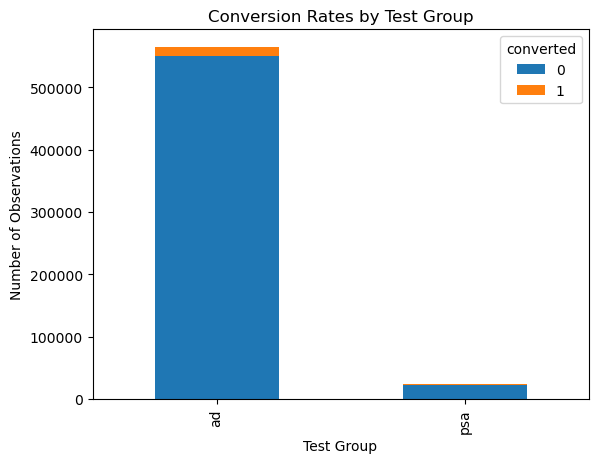

In [25]:
# Plot the contingency table as a stacked bar plot

contingency_table.plot(kind='bar', stacked=True)

plt.title('Conversion Rates by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Number of Observations')
plt.show()